<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Assignment_01_Regression_Solutions_BoneMarrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Assignment 1: Neural Networks for Analysis of Tabular Data**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)



# **READ CAREFULLY**

The **_first_**  digit in your myUTSA ID (e.g. "abc123") will determine which dataset you are to analyze for this assignment and which type of neural network (i.e. classification or regression) you will need to construct. For example, if your myUTSA ID was **vue682**, then your first digit is the number `6`.

**---WARNING------WARNING------WARNING------WARNING------WARNING------WARNING---**

You are **not** free to choose any dataset for this assignment. If analyze the wrong dataset, your assignment will **NOT BE GRADED** and you will automatically receive a **`1`**. If you are uncertain which dataset you should be working on, contact your Instructor for help. Remember, your score in this assignment will have a large impact on your course grade so please be careful.


| First Digit myUTSA ID    | Dataset to Analyze      | Neural Network Type
--------------------------|-------------------------|-----------------
0                         | Hepatitis               | Binary Classification
1                         | Coimbra Breast Cancer   | Binary Classification
2                         | Parkinson Speech        | Binary Classification
3                         | Indian Liver            | Binary Classification
4                         | Fetal Health            | Multiclass Classification
5                         | Dermatology             | Multiclass Classification
6                         | Maternal Health         | Multiclass Classification
7                         | Bone Marrow Transplant  | Regression
8                         | German Breast Cancer    | Regression
9                         | Diabetes Progression    | Regression

#### **NOTE: You can only use this Colab notebook if the first digit of your _myUTSA_ ID  is between `7` and `9`.**

# **The Purpose of Assignments**

In this course, **_Assignments_** are designed to help me (and you) assess your ability to transfer knowledge gained in completing class coding exercises to solving more realistic problems.

Assignments play a pivotal role in reinforcing your learning, as they require you to apply theoretical concepts to practical scenarios. This helps solidify your understanding and enhances your problem-solving skills. By tackling these assignments independently, you develop critical thinking and the ability to synthesize information from various sources. Moreover, assignments encourage you to explore topics more deeply, fostering intellectual curiosity and promoting a deeper engagement with the subject matter. Ultimately, these assignments are not just a measure of your learning, but a means to equip you with the skills needed for real-world applications and future challenges.

## **MAKE A COPY OF THIS NOTEBOOK!**

For your assignment to be graded, you **must** make a copy of this Colab notebook in your GDrive and use this copy as your worksheet.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this assignment. By running this code cell, you will map your Google Drive to ```/content/drive``` and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this assignment.

In [ ]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    Colab = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this assignment.")
    Colab = False

Your GMAIL address **must** appear in the output in order for your work to be graded. If your GMAIL is not visible you will receive a `0` for your grade. You will not be given a second chance to fix this problem!

# **Assigment 1: Regression**

**Assignment_01** is specifically designed to assess your ability to write the Python/PyTorch code necessary to build neural networks that can analyze tabular data stored in a Pandas DataFrame. These analyzes include: (1) binary classification, (2) multiclass classification and (3) regression.

You will use this Colab notebook **only** if the first digit in your myUTSA ID is between `7` and `9`. If that is correct, you have been assigned to perform **regression**.

Unlike your class lessons, you will **not** be given examples that you can use to simply copy-and-paste code. Rather, you will be given a problem to solve and it will be up to you to use code snippets that you have been given previously to solve different aspects of this assignment. And unlike your class lessons, your will **not** be given the correct output. In other words, this assignment is basically how you would solve an actual biomedical problem.


# **Regression by Neural Networks**
**Regression** of tabular data is a type of supervised learning task where the goal is to predict a continuous target variable based on the attributes of the observations.

#### **Regression:**
Regression deals with problems where the outcome is a continuous variable. Examples include:
1. **Medical Predictions:**
   - Predicting blood pressure levels based on patient attributes.
   - Estimating the progression of a disease over time.
   - Forecasting patient recovery times after surgery.
   - Estimating the cost of medical treatments.

2. **Biological Predictions:**
   - Predicting enzyme activity levels based on substrate concentration.
   - Estimating growth rates of bacteria or cell cultures under different conditions.
   - Forecasting gene expression levels based on environmental factors.
   - Estimating the concentration of hormones in blood samples.

3. **Disease Progression:**
   - Predicting tumor growth rates based on imaging data.
   - Estimating the severity of disease symptoms over time.
   - Forecasting the spread of infectious diseases in a population.
   - Estimating the decline in lung function in patients with respiratory diseases.

4. **Treatment Outcomes:**
   - Predicting patient response to different medication dosages.
   - Estimating the duration of hospital stays based on initial symptoms.
   - Forecasting the likelihood

# **Descriptions of Data Sets for Regression**

This section describes the various datasets, information for downloading them, and what variable(s) your network should predict. Remember, you do **not** earn and credit if you analyze the wrong dataset. Pay particular attention to the **variable for Regression** for your assigned dataset. You will need to know the name of this feature when you are constructing yor `X-` and `Y-feature` vectors.


-----------------------------
## **Bone Marrow Transplant - 1st myUTSA Digit = 7**

#### **Filename:** `bone_marrow_transplant.csv`
#### **Response Variable for Regression (target column):** `survival_time`

### **Bone Marrow Transplant dataset**

The **Bone Marrow Transplant** dataset describes pediatric patients with several hematologic diseases: malignant disorders (e.g. patients with acute lymphoblastic leukemia, with acute myelogenous leukemia, with chronic myelogenous leukemia, with myelodysplastic syndrome) and nonmalignant cases (i.a. patients with severe aplastic anemia, with Fanconi anemia, with X-linked adrenoleukodystrophy).

All patients were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.

The motivation of this study was to identify the most important factors influencing the success or failure of the transplantation procedure. In particular, verification of the research hypothesis that increased dosage of CD34+ cells / kg extends overall **survival time** without simultaneous occurrence of undesirable events affecting patients' quality of life.

#### Features:

1. **Recipientgender:** Male, Female
- **Stemcellsource:** Source of hematopoietic stem cells (Peripheral blood - 1	 Bone marrow - 0)
2. **Donorage:** Age of the donor at the time of hematopoietic stem cells apheresis
3. **Donorage35:** - Donor age <35 - 0	 Donor age >=35 - 1
- **IIIV:** - Development of acute graft versus host disease stage II or III or IV (Yes - 1	 No - 0)
4. **Gendermatch:** Compatibility of the donor and recipient according to their gender (Female to Male - 1	 Other - 0)
- **DonorABO:** ABO blood group of the donor of hematopoietic stem cells (0 - 0	1	 A	 B=-1	 AB=2)
5. **RecipientABO:** ABO blood group of the recipient of hematopoietic stem cells (0 - 0	1	 A	 B=-1	 AB=2)
6. **RecipientRh:** Presence of the Rh factor on recipientï¿½s red blood cells ('+' - 1	 '-' - 0)
7. **ABOMatch:** Compatibility of the donor and the recipient of hematopoietic stem cells according to ABO blood group (matched - 1	 mismatched - 1)
8. **CMVstatus:** Serological compatibility of the donor and the recipient of hematopoietic stem cells according to cytomegalovirus
infection prior to transplantation (the higher the value the lower the compatibility)
9. **RecipientCMV:** Presence of cytomegalovirus infection in the donor of hematopoietic stem cells prior to transplantation (presence - 1	 absence - 0)
10. **Disease:** Type of disease (ALL	AML	chronic	nonmalignant lymphoma)
11. **Riskgroup:** High risk - 1	 Low risk - 0
12. **Txpostrelapse:** The second bone marrow transplantation after relapse (No - 0; Yes - 1)
13. **Diseasegroup:** Type of disease (malignant - 1	 nonmalignant - 0)
14. **HLAmatch:** Compatibility of antigens of the main histocompatibility complex of the donor and the recipient of hematopoietic stem cells					according to ALL international BFM SCT 2008 criteria
15. **HLAmismatch:** - HLA matched - 0	 HL mismatched - 1
16.**Antigen:** In how many anigens there is difference beetwen the donor nad the recipient (-1 - no differences	 0 - one difference	1 (2) - two (three) diffences)
17. **Allel:** In how many allele there is difference beetwen the donor nad the recipient {-1 no differences	0 - one difference	 1 (2) (3) - two	 (tree	 four) differences)
18. **HLAgrI:** The differecne type beetwien the donor and the recipient (HLA mateched - 0	the difference is in only one antigen - 1, the difference is only in one allel - 2, the difference is only in DRB1 cell - 3, two differences (two allele or two antignes) - 4, two differences (two allele or two antignes) - 5)
19. **Recipientage:** Age of the recipient of hematopoietic stem cells at the time of transplantation
20. **Recipientage10:**  Recipient age <10 - 0	 Recipient age>=10 - 1
21. **Recipientageint:** Recipient age in (0	5] - 0	 (5	 10] - 1	 (10	 20] - 2
22. **Relapse:** Reoccurrence of the disease (No - 0	 Yes - 1)
23. **aGvHDIIIIV:** Development of acute graft versus host disease stage III or IV (Yes - 0	 No - 1)
24. **extcGvHD:** Development of extensive chronic graft versus host disease (Yes - 0	 No - 1)
25. **CD34kgx10d6:** CD34+ cell dose per kg of recipient body weight (10^6/kg)
26. **CD3dCD34:** CD3+ cell to CD34+ cell ratio
27. **CD3dkgx10d8:** CD3+ cell dose per kg of recipient body weight (10^8/kg)
28. **Rbodymass:** Body mass of the recipient of hematopoietic stem cells at the time of transplantation
29. **ANCrecovery:** Time to neutrophils recovery defined as neutrophils count >0.5 x 10^9/L
30. **PLTrecovery:**  Time to platelet recovery defined as platelet count >50000/mm3
31. **time_to_aGvHD_III_IV:** Time to development of acute graft versus host disease stage III or IV
32. **survival_status:** Survived (Yes - 0 No - 1)

#### Target: (y values)
**survival_time**
* **Survival time** in days

------------------------------------------

## **German Breast Cancer Dataset - 1st myUTSA Digit = 8**

#### **Filename:** `GermanBreastCancer.csv`
#### **Response Variable for Regression (Y):** `time`

### **German Breast Cancer Study Group (GBSG2) dataset**

The **German Breast Cancer Study Group (GBSG2)** dataset studies the effects of hormone treatment on recurrence-free survival time. The event of interest is the recurrence of cancer time. This data frame contains the observations of 686 women.

#### Features:

1.**horTh:** hormonal therapy, a factor at two levels (yes 1 and no 2).
2. **age:** age of the patients in years.
3. **menostat:** menopausal status, a factor at two levels pre (premenopausal = 1) and post (postmenopausal = 2).
4. **tsize:** tumor size (in mm).
5. **tgrade:** tumor grade, a ordered factor at levels 1 < 2 < 3.
6. **pnodes:** number of positive nodes.
7. **progrec:** progesterone receptor (in fmol).
8. **estrec:** estrogen receptor (in fmol).
9. **time:** recurrence free survival time (in days). Response variable (Y values)
10. **cens:** censoring indicator (0- censored, 1- event).


-----------------------------------------

## **Diabetes Progression Dataset - 1st myUTSA Digit = 9**

#### **Filename:** `diabetes_progrssion.csv`

#### **Response Variable for Regression (Y):** `disease_progression`

**Diabetes** is more than just a high blood sugar condition; it’s a complex, chronic illness that, if not managed properly, can lead to severe health complications like heart disease, nerve damage, and kidney failure. Recognizing the urgency of effective management, I embarked on a project to predict diabetes progression using advanced data science techniques. This project involved regression analysis, data visualization, and model evaluation. The complete code is available on my GitHub page, aiding better medical decision-making and patient care.

**Dataset Overview**

The Diabetes dataset, a mainstay in regression analysis, includes ten baseline variables such as age, sex, BMI, average blood pressure, and six blood serum measurements for 442 diabetes patients. The target variable is a quantitative measure of disease progression one year after the baseline.

**Data Characteristics:**
**Number of Instances:** 442
**Number of Attributes:** 10 numeric predictive values
**Target:** Quantitative measure of disease progression

**Attribute Information:**
- **age:** Age in years
- **sex:** Gender of the patient
- **bmi:** Body mass index
- **bp:** Average blood pressure
- **serum_chol:** Total serum cholesterol (mg/dL)
- **ldl:** Low-density lipoproteins (mg/dL)
- **hdl:** High-density lipoproteins (mg/dL)
- **chol_hdl_ratio:** Total cholesterol / HDL
- **log_trigly:** Log of serum triglycerides level
- **blood_glu:** Blood sugar level (mg/dL)
- **disease_progression:** Disease progression one year after baseline. Response variable (Y values)

# **General Instructions**

To make the assignment more manageable, you will given a number of specific steps to perform. To help guide you in writing your code, you will be given a specific example in a particular class lesson that you can use for a reference. For example, in **Step 1: Download and Extract Data** you are given **REF: Class_01_6: Examples 1 & 2**. That means Examples 1 and 2 in `Class_01_6` provide code that you can use to complete that step of this assignment.

### **Variable Names**

In writing your code for this assignment, you are free to give your variables any name that makes sense to you. This includes the name of the DataFrame that holds your data. When you `copy-and-paste` code from earlier Class assignments, you always have to edit the name of the DataFrame to match the name you select for this assignment in **Step 1**.

When it has been necessary to give an example that includes a DataFrame name, the DataFrame has been called `df` or `my_df`. You will need to edit these names to match the actual name you give to your DataFrame in **Step 1**.

### **Can I Use AI?**

You are free to use AI (e.g. Microsoft Co-Pilot) to help you complete your assignment---but you need to be very careful.

While AI can be very helpful in correcting coding errors, but it can also give you code that is totally incorrect for this assignment. A small number of students in previous classes have flunked their assignment by using AI code that did not generate the correct output. Useless you give the AI a well-constructed prompt, the answer you get back might lead you in the wrong direction.

If your aren't sure what you are doing, it's **much, much safer to get help with any of your coding problems from your course instructor and/or course TA's.**

### Create functions

The cell below creates a custom function needed for this assignment. If you don't run this cell, you will receive errors later when you try to run some cells.

In [1]:
# Create functions for this lesson

# ------------------------------------------------------------------------
# 0️⃣  Create hms_string()
# ------------------------------------------------------------------------

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

## **Step 1: Download and Extract Data**

**REF: Class_01_6: Example 1**

In the cell below, write the code to download your datafile from the course server and create a `Pandas` DataFrame to store your data. You are free to choose any name for your DataFrame, just make sure to keep it consistent throughout this assignment.

**Code Hints:**

1. When using the command `pd.read_csv()` the file separator argument `sep` will be always be a comma **`,`**

2. You can **only** use the assigned dataset downloaded from the course file server https://biologicslab.co/BIO1173/data/, even if you happen to find a dataset with the same name at a different web location.

3. **If you don't download your assigned datafile from the course file server, you will receive a score of `1` point out of 100.**

4. Use this code to set your display settings:
```text
# Set max columns and max rows
pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', 8)
```
5. At the end of the cell use the function `display(df)` to show your DataFrame.


In [2]:
# Step 1: Download and Extract Data

import pandas as pd

# Read data file using Pandas read_csv() function
df = pd.read_csv("https://biologicslab.co/BIO1173/data/bone_marrow_transplant.csv",
                  sep=',',
                  na_values=["?", "NA", "null", ""])

# Set max columns and max rows
pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', 8)

# Print out the first 5 records using the head() method
df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,Riskgroup,Txpostrelapse,Diseasegroup,HLAmatch,HLAmismatch,Antigen,Alel,HLAgrI,Recipientage,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,Male,1,22.830137,0,1,0,1,1,1,0,3,1,1,1,0,1,0,0,-1,-1,0,9.6,0,1,0,0,1,7.20,1.338760,5.38,35.0,19,51,32,999,0
1,Male,0,23.342466,0,1,0,-1,-1,1,0,0,0,0,0,0,1,0,0,-1,-1,0,4.0,0,0,1,1,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,Male,0,26.394521,0,1,0,-1,-1,1,0,2,0,1,0,0,1,0,0,-1,-1,0,6.6,0,1,1,1,1,7.94,19.013230,0.42,23.4,23,20,1000000,435,1
3,Female,1,33.358904,0,0,0,1,2,0,1,0,0,1,1,0,1,1,0,1,0,1,1.3,0,0,0,1,1,51.85,3.972255,13.05,9.0,14,14,1000000,2043,0
4,Female,1,32.641096,0,0,0,2,0,1,1,2,0,1,0,0,0,0,0,-1,-1,0,7.9,0,1,0,1,1,23.54,3.772555,6.24,20.5,15,14,1000000,671,0


If your code is correct you should see a table with a relatively large number of columns that may very well extend beyond the right edge of your notebook display.

## **Step 2: Print Summary Statistics**

**REF: Class_01_6: Example 3**

In the cell below use `df.describe()` to print put the summary statistics of your DataFrame.  

**Code Hints:**

Use this code to set your print output:
```text
# Set max columns and max rows
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 8)
```


In [3]:
# Step 2: Print summary statistics

import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 8)

# Describe() method with df
df.describe()


,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,...,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,137.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.816901,32.931082,0.408451,0.612676,0.169014,0.366197,...,34.118248,15.098592,21157.415493,795781.401408,1141.021127,0.338028
std,0.388116,8.007697,0.493287,0.488863,0.376091,0.837752,...,17.972121,2.839213,144311.424226,404548.067037,816.815287,0.474713
min,0.000000,18.646575,0.000000,0.000000,0.000000,-1.000000,...,6.400000,10.000000,10.000000,10.000000,68.000000,0.000000
25%,1.000000,26.461644,0.000000,0.000000,0.000000,0.000000,...,19.000000,13.000000,15.000000,1000000.000000,405.500000,0.000000
50%,1.000000,31.708219,0.000000,1.000000,0.000000,0.000000,...,30.500000,15.000000,20.000000,1000000.000000,1021.500000,0.000000
75%,1.000000,40.267808,1.000000,1.000000,0.000000,1.000000,...,49.000000,17.000000,29.000000,1000000.000000,1774.250000,1.000000
max,1.000000,52.476712,1.000000,1.000000,1.000000,2.000000,...,76.000000,26.000000,1000000.000000,1000000.000000,3364.000000,1.000000


Your output should be table showing summary statistics for each _numeric_ column in your DataFrame.

## **Step 3: Find Missing Values**

**REF: Class_01_6: Example 4**

Use `df.isnull()` to find any missing values in your DataFrame. Print out the missing locations in two vertical columns titled `column_name` and `has_missing`.  


In [4]:
# Step 3: Find missing values

import pandas as pd

# Identify whether each column contains missing values
missing_locations = df.isnull().any()

# Create a DataFrame that pairs column names with the missing‑flag
summary_df = pd.DataFrame({
    'column_name': df.columns,
    'has_missing': missing_locations
})

print(summary_df.to_string(index=False))

         column_name  has_missing
     Recipientgender        False
      Stemcellsource        False
            Donorage        False
          Donorage35        False
                IIIV        False
         Gendermatch        False
            DonorABO        False
        RecipientABO        False
         RecipientRh        False
            ABOmatch        False
           CMVstatus        False
            DonorCMV        False
        RecipientCMV        False
           Riskgroup        False
       Txpostrelapse        False
        Diseasegroup        False
            HLAmatch        False
         HLAmismatch        False
             Antigen        False
                Alel        False
              HLAgrI        False
        Recipientage        False
      Recipientage10        False
     Recipientageint        False
             Relapse        False
          aGvHDIIIIV        False
            extcGvHD        False
         CD34kgx10d6        False
            CD

If your code is correct you should see a list of all the columns in your DataFrame and whether or not any column has one (or more) missing data. Make careful note of name of any column that is missing data.

## **Step 4: Replace Missing Values**

**REF: Class_01_6: Example 5**

Use `df.fillna()` to replace any missing values in your DataFrame with the median value of that column. Use the same print commands as in `Class_01_6: Example 5` to show what was done.

In [5]:
# Step 4: Replace missing values

import pandas as pd

# ------------------------------------------------------------------------
# 1️⃣  Define the column name that is missing data
# ------------------------------------------------------------------------
col_name_missing_data = 'Rbodymass'

# ------------------------------------------------------------------------
# 2️⃣  Pick the column that contains missing values
# ------------------------------------------------------------------------
if col_name_missing_data not in df.columns:
    raise ValueError(f"Column '{col_name_missing_data}' not found!")

print(f"\nColumn with missing data is {col_name_missing_data}")

# ------------------------------------------------------------------------
# 3️⃣  Compute the median (ignoring NaNs by default)
# ------------------------------------------------------------------------
missing_val_med = df[col_name_missing_data].median()
print(f"The median value of the missing datapoint = {missing_val_med:.4f}.")
print(f"Replacing missing values with {missing_val_med:.4f}.\n")

# ------------------------------------------------------------------------
# 4️⃣   Fill the NaNs
# ------------------------------------------------------------------------
df[col_name_missing_data] = df[col_name_missing_data].fillna(missing_val_med)

# ------------------------------------------------------------------------
# 5️⃣  Verify no more missing values in that column
# ------------------------------------------------------------------------
missing_locations = df.isnull().any()
summary_df = pd.DataFrame({
    'column_name': df.columns,
    'has_missing': missing_locations
})

# ------------------------------------------------------------------------
# 6️⃣  Print summary
# ------------------------------------------------------------------------
print("\nAfter filling, check which columns still contain missing values:")
print(summary_df.to_string(index=False))


Column with missing data is Rbodymass
The median value of the missing datapoint = 30.5000.
Replacing missing values with 30.5000.


After filling, check which columns still contain missing values:
         column_name  has_missing
     Recipientgender        False
      Stemcellsource        False
            Donorage        False
          Donorage35        False
                IIIV        False
         Gendermatch        False
            DonorABO        False
        RecipientABO        False
         RecipientRh        False
            ABOmatch        False
           CMVstatus        False
            DonorCMV        False
        RecipientCMV        False
           Riskgroup        False
       Txpostrelapse        False
        Diseasegroup        False
            HLAmatch        False
         HLAmismatch        False
             Antigen        False
                Alel        False
              HLAgrI        False
        Recipientage        False
      Recipientage10

You should see the same list that was generated by Step 2 except now all of the values in the `has_missing` column should now be `False`.  

## **Step 5: Display Data Types**

**REF: Class_02_2: Example 1 - Step 2**

Display the different data types in your DataFrame using `df.info()` method.

**Code Hints:**

Set your print option using this code chunk:
```text
# Set max rows to the number of columns
pd.set_option('display.max_rows', len(df.columns))
```
where `df` is the name of your DataFrame.

In [6]:
# Step 5: Display data types

import pandas as pd

# Set max rows to the number of columns
pd.set_option('display.max_rows', len(df.columns))

# Print data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       142 non-null    object 
 1   Stemcellsource        142 non-null    int64  
 2   Donorage              142 non-null    float64
 3   Donorage35            142 non-null    int64  
 4   IIIV                  142 non-null    int64  
 5   Gendermatch           142 non-null    int64  
 6   DonorABO              142 non-null    int64  
 7   RecipientABO          142 non-null    int64  
 8   RecipientRh           142 non-null    int64  
 9   ABOmatch              142 non-null    int64  
 10  CMVstatus             142 non-null    int64  
 11  DonorCMV              142 non-null    int64  
 12  RecipientCMV          142 non-null    int64  
 13  Riskgroup             142 non-null    int64  
 14  Txpostrelapse         142 non-null    int64  
 15  Diseasegroup          1

Inspect the column `Dtype` for the word `object`. This means the column contains string values that need to be mapped to an integer value or one-hot encoded when generating the X- and y- feature vectors.

## **Step 6: One-Hot Encode Categorical Variables**

**REF: Class_02_2: Example 3**

In the cell below, write the code to one-hot encode all of the categorical variables in your DataFrame. Your code should follow Example 3 in Class_02_2 so you will end up with a new dataframe contained the encoded values.

**WARNING:** It is important **_not_** to one-hot encode the **target_column** in this step. The name of the `target_column` was given to you as part of your datafile description near the beginning of this assignment. If you accidently encode the target_column, you will have to start over from Step 1.

Use the `display()` function to print the values in your DataFrame before encoding and then print out the values in your new, encoded DataFrame.

In [7]:
# Step 6: One-Hot Encode Categorical Variables

import numpy as np
import pandas as pd

# Set target name
target_name = 'survival_time'

# Separate the target column
y_column = df[target_name]

# Drop target from features before encoding
df_features = df.drop(columns=[target_name])

# One-hot encode only the features (not the target)
df_encoded_features = pd.get_dummies(df_features, dtype=int, drop_first=True)

# Add the target column back (without encoding it)
df_encoded = df_encoded_features.copy()
df_encoded[target_name] = y_column

# Set display options
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 4)

# Display DataFrame
print("Before One-hot encoding")
display(df)
print("After One-hot encoding")
display(df_encoded)

Before One-hot encoding


,Recipientgender,Stemcellsource,...,survival_time,survival_status
0,Male,1,...,999,0
1,Male,0,...,163,1
...,...,...,...,...,...
140,Female,1,...,1895,0
141,Female,1,...,382,1


After One-hot encoding


,Stemcellsource,Donorage,...,Recipientgender_Male,survival_time
0,1,22.830137,...,1,999
1,0,23.342466,...,1,163
...,...,...,...,...,...
140,1,27.347945,...,0,1895
141,1,27.780822,...,0,382


You should see two tables. The top table should show your DataFrame `Before One-hot encoding` while the bottom table should show your DataFrame `After One-hot encoding`. The `target_column` should **not** be one-hot encoded!

## **Step 7: Create Feature Vectors for Regression Neural Network**

**REF: Class_02_2: Example 8**

In the cell below, write the code to preprocess the data in your DataFrame to create `X-` and `y-` feature vectors for a regression neural network.


In [9]:
# Step 7: Create feature vector for Regression Neural Network

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# ------------------------------------------------------------------
# Identify feature / target columns
# ------------------------------------------------------------------
TARGET_COL = "survival_time"  # continuous variable we want to predict

# 1. Create the X DataFrame by dropping the target column
X_df = df_encoded.drop(columns=[TARGET_COL])

# 2. Create the y Series (Target)
y_temp = df_encoded[TARGET_COL]

# ------------------------------------------------------------------
# DEBUG: Check data types before normalization
# ------------------------------------------------------------------
print("Data types in bc_X_df:")
print(X_df.dtypes)
print("\nColumns with non-numeric types:")
non_numeric_cols = X_df.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric_cols)

# ------------------------------------------------------------------
# Intelligent Normalization (Standardize Continuous, Skip Binary)
# ------------------------------------------------------------------
# Create a copy to avoid warnings
X_normalized = X_df.copy()

for col in X_normalized.columns:
    # Skip non-numeric columns entirely
    if X_normalized[col].dtype == 'object' or X_normalized[col].dtype.name == 'category':
        print(f"Warning: Skipping non-numeric column '{col}' with dtype {X_normalized[col].dtype}")
        continue

    # Check if the column contains only 0s and 1s
    unique_vals = X_normalized[col].dropna().unique()
    is_binary = np.array_equal(np.sort(unique_vals), np.array([0, 1])) or \
                np.array_equal(np.sort(unique_vals), np.array([0])) or \
                np.array_equal(np.sort(unique_vals), np.array([1]))

    # If it is NOT binary, apply Z-score normalization
    if not is_binary:
        mean = X_normalized[col].mean()
        std = X_normalized[col].std()
        if std != 0:
            X_normalized[col] = (X_normalized[col] - mean) / std

# Convert X to Numpy (only numeric columns)
X_normalized_numeric = X_normalized.select_dtypes(include=[np.number])
X = X_normalized_numeric.values
y = y_temp.values

# ------------------------------------------------------------------
# Split into train / test sets
# ------------------------------------------------------------------
test_size = 0.2

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=42,
    shuffle=True,
)

# ------------------------------------------------------------------
# Scale the target (Crucial for Regression NN convergence)
# ------------------------------------------------------------------
scale_y = True
y_scaler = None

if scale_y:
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_val = y_scaler.transform(y_val.reshape(-1, 1)).ravel()

# ------------------------------------------------------------------
# Convert to PyTorch Tensors
# ------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)

# ------------------------------------------------------------------
# Inspect the first few rows
# ------------------------------------------------------------------
np.set_printoptions(suppress=True, precision=4)

print(f"\nFeature matrix shape: {X_train.shape}")
print(f"Target matrix shape: {y_train.shape}")

print("\nFirst 4 rows of processed X (Train):")
print(X_train_tensor[:4].cpu().numpy())

print("\nCorresponding scaled targets (Train):")
print(y_train_tensor[:4].cpu().numpy())

Data types in bc_X_df:
Stemcellsource            int64
Donorage                float64
                         ...   
survival_status           int64
Recipientgender_Male      int64
Length: 35, dtype: object

Columns with non-numeric types:
[]

Using device: cpu

Feature matrix shape: (113, 35)
Target matrix shape: (113,)

First 4 rows of processed X (Train):
[[ 1.     -1.168   0.      1.      0.     -1.6308 -1.3161  1.      1.
  -0.4668  1.      0.      0.      0.      1.     -0.8702  0.     -0.9385
  -0.8595 -0.7287 -0.6065  0.     -0.2282  0.      1.      1.     -0.0444
  -0.3245  0.4654 -0.8883 -0.0347 -0.1465  0.5048  0.      1.    ]
 [ 1.      0.1677  0.      1.      1.     -0.4371 -0.272   1.      0.
  -0.4668  1.      0.      0.      0.      1.      0.417   0.      1.0655
   0.2811  1.0451  0.8609  1.      0.9721  0.      1.      1.     -0.6867
  -0.4438  0.9609  0.7931 -0.0347 -0.1446  0.5048  0.      1.    ]
 [ 1.     -1.3035  0.      0.      0.     -0.4371  0.772   1.      

If you code is correct you should see the first 4 rows of the processed `X` data and below their corresponding y values.

## **Step 8: Construct and Train a Regression Neural Network**

**REF: Class_02_2 Example 9**

In the cell below write the code to construct and train a regression neural network.


In [11]:
# Step 8: Construct and Train a Regression neural network

import os
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# ---------------------------------------------------------------------------
# Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
lr = 0.0010
BATCH_SIZE = 32

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ---------------------------------------------------------------------------
# DATA SETUP: Create Unique Tensors for this Example
# ---------------------------------------------------------------------------
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# ---------------------------------------------------------------------------
# Define Model Architecture
# ---------------------------------------------------------------------------
class BreastCancerRegressionModel(nn.Module):
    def __init__(self, input_shape):
        super(BreastCancerRegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_shape, 25)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.layer2 = nn.Linear(25, 50)
        self.output = nn.Linear(50, 1) # Linear output for regression

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

# Initialize Model
input_dim = X_train_tensor.shape[1]
reg_model = BreastCancerRegressionModel(input_dim).to(device)

# ---------------------------------------------------------------------------
# Define Loss and Optimizer
# ---------------------------------------------------------------------------
criterion = nn.MSELoss()
mae_metric = nn.L1Loss()

reg_optimizer = optim.Adam(reg_model.parameters(), lr=lr)
reg_scheduler = optim.lr_scheduler.ReduceLROnPlateau(reg_optimizer, mode='min', factor=0.5, patience=PATIENCE)

# ---------------------------------------------------------------------------
# Training Loop
# ---------------------------------------------------------------------------
print(f"-- Training (regression) starting for {EPOCHS} epochs --")
start_time = time.time()

best_val_loss = float('inf')
early_stop_counter = 0

reg_history = {'train_loss': [], 'train_mae': [], 'val_loss': [], 'val_mae': []}
checkpoint_path = "bc_reg_best_regression_model.pth"

for epoch in range(EPOCHS):
    reg_model.train()

    train_loss = 0.0
    train_mae = 0.0

    for inputs, targets in  train_loader:
        reg_optimizer.zero_grad()
        outputs = reg_model(inputs)

        # Reshape targets to match output (batch, 1)
        targets = targets.view(-1, 1)

        loss = criterion(outputs, targets)
        mae = mae_metric(outputs, targets)

        loss.backward()
        reg_optimizer.step()

        train_loss += loss.item()
        train_mae += mae.item()

    # Calculate average epoch metrics
    avg_train_loss = train_loss / len(train_loader)
    avg_train_mae = train_mae / len(train_loader)

    # --- Validation Phase ---
    reg_model.eval()
    with torch.no_grad():
        val_outputs = reg_model(X_val_tensor)
        val_targets_reshaped = y_val_tensor.view(-1, 1)

        val_loss = criterion(val_outputs, val_targets_reshaped).item()
        val_mae = mae_metric(val_outputs, val_targets_reshaped).item()

    # Update history
    reg_history['train_loss'].append(avg_train_loss)
    reg_history['train_mae'].append(avg_train_mae)
    reg_history['val_loss'].append(val_loss)
    reg_history['val_mae'].append(val_mae)

    reg_scheduler.step(val_loss)

    # Checkpoint & Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(reg_model.state_dict(), checkpoint_path)
        print(f"Epoch {epoch+1}: Val Loss improved to {val_loss:.4f}, Val MAE: {val_mae:.4f} [Saved]")
    else:
        early_stop_counter += 1
        if epoch % 10 == 0:
             print(f"Epoch {epoch+1}: Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")

    if early_stop_counter >= PATIENCE:
        print(f"\nEarly stopping triggered at epoch {epoch+1}")
        break

# ---------------------------------------------------------------------------
# Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print(f"Best validation Loss (MSE): {best_val_loss:.4f}")
print(f"Best validation MAE: {min(reg_history['val_mae']):.4f}")

def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")

Using device: cpu
-- Training (regression) starting for 200 epochs --
Epoch 1: Val Loss improved to 1.4500, Val MAE: 1.0216 [Saved]
Epoch 2: Val Loss improved to 1.4446, Val MAE: 1.0212 [Saved]
Epoch 3: Val Loss improved to 1.4352, Val MAE: 1.0186 [Saved]
Epoch 4: Val Loss improved to 1.4255, Val MAE: 1.0153 [Saved]
Epoch 5: Val Loss improved to 1.4117, Val MAE: 1.0108 [Saved]
Epoch 6: Val Loss improved to 1.4004, Val MAE: 1.0067 [Saved]
Epoch 7: Val Loss improved to 1.3889, Val MAE: 1.0026 [Saved]
Epoch 8: Val Loss improved to 1.3747, Val MAE: 0.9975 [Saved]
Epoch 9: Val Loss improved to 1.3585, Val MAE: 0.9914 [Saved]
Epoch 10: Val Loss improved to 1.3427, Val MAE: 0.9847 [Saved]
Epoch 11: Val Loss improved to 1.3237, Val MAE: 0.9766 [Saved]
Epoch 12: Val Loss improved to 1.3104, Val MAE: 0.9692 [Saved]
Epoch 13: Val Loss improved to 1.2925, Val MAE: 0.9592 [Saved]
Epoch 14: Val Loss improved to 1.2785, Val MAE: 0.9516 [Saved]
Epoch 15: Val Loss improved to 1.2658, Val MAE: 0.9448 [S

If your code is correct, you should **not** see any output after running the previous cell. If you see any output you didn't follow directions and your grade will be reduced accordingly.

## **Step 9: Plot Predicted vs Actual Values**

**REF: Class_02_2: Example 10**

In the cell below, generate a plot showing Predicted vs Actual Values.

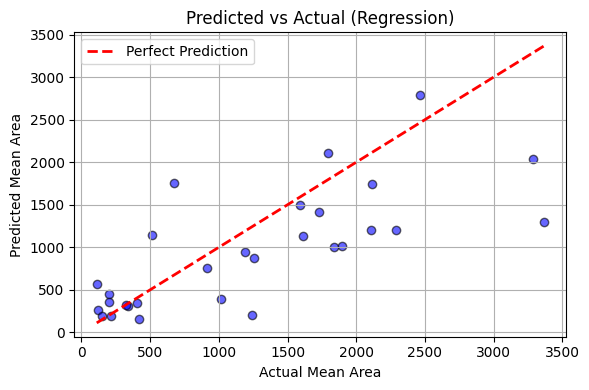

In [13]:
# Step 9: Plot Predicted vs Actual Values

import numpy as np
import matplotlib.pyplot as plt
import torch

# 1. Set model to evaluation mode
reg_model.eval()

# 2. Predict using validation tensor
with torch.no_grad():
    y_pred_tensor = reg_model(X_val_tensor)
    y_pred_scaled = y_pred_tensor.cpu().numpy()

# 3. Inverse transform (Uses y_scaler from Ex 8)
y_pred = y_scaler.inverse_transform(y_pred_scaled).ravel()
y_true = y_scaler.inverse_transform(y_val.reshape(-1, 1)).ravel()

# 4. Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_true, y_pred, alpha=0.6, color='blue', edgecolor='k')

plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Mean Area")
plt.ylabel("Predicted Mean Area")
plt.title("Predicted vs Actual (Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

If your code is correct you should see a single plot showing `Predicted vs Actual Values` with a dashed red line showing `Perfect Predictions`.

## **Assignment Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Microsoft Print to PDF** to generate a PDF of your Colab notebook if you are using a Windows computer; Use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook if you are using a Mac.  Name your PDF as `Copy of Assignment_01.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **---WARNING---WARNING--WARNING---**

Unlike class lessons, you are **only given 1 submission** for assignments. If you failed to carefully follow directions and make a bad mistake you won't have a 2nd chance to correct your errors.

Therefore, you are **STRONGLY ENCOURAGED** to have your completed assignment checked by an Instructor **_before_** you submit your PDF to Canvas. Every semester one (or more) students fail to follow directions and receive an automatic `1` on an assignment--which virtually assures that the student just had their final course grade significantly lower. Don't be that student!

## **Lizard's Tail**

## **DeepSeek**

![__](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/DeepSeek_logo.svg/1920px-DeepSeek_logo.svg.png)

**DeepSeek** (Chinese: 深度求索; pinyin: Shēndù Qiúsuǒ) is a Chinese artificial intelligence company that develops open-source large language models (LLMs). Based in Hangzhou, Zhejiang, it is owned and funded by Chinese hedge fund High-Flyer, whose co-founder, Liang Wenfeng, established the company in 2023 and serves as its CEO.

The DeepSeek-R1 model provides responses comparable to other contemporary large language models, such as OpenAI's GPT-4o and o1. It is trained at a significantly lower cost—stated at US$6 million compared to $100 million for OpenAI's GPT-4 in 2023—and approximately a tenth of the computing power used for Meta's comparable model, LLaMA 3.1. DeepSeek's AI models were developed amid United States sanctions on China and other countries for chips used to develop artificial intelligence, which were intended to restrict the ability of these countries to develop advanced AI systems. Lesser restrictions were later announced that would affect all but a few countries.

On 10 January 2025, DeepSeek released its first free chatbot app, based on the DeepSeek-R1 model, for iOS and Android; by 27 January, DeepSeek had surpassed ChatGPT as the most-downloaded free app on the iOS App Store in the United States,[10] causing Nvidia's share price to drop by 18%. DeepSeek's success against larger and more established rivals has been described as "upending AI"[10] and ushering in "a new era of AI brinkmanship". DeepSeek's compliance with Chinese government censorship policies and its data collection practices have also raised concerns over privacy and information control in the model, prompting regulatory scrutiny in multiple countries.

DeepSeek makes its generative artificial intelligence algorithms, models, and training details open-source, allowing its code to be freely available for use, modification, viewing, and designing documents for building purposes.However, reports indicate that the API version hosted in China applies content restrictions in accordance with local regulations, limiting responses on topics such as the Tiananmen Square massacre and Taiwan’s status. The company reportedly vigorously recruits young AI researchers from top Chinese universities, and hires from outside the computer science field to diversify its models' knowledge and abilities.

**Background**

In February 2016, High-Flyer was co-founded by AI enthusiast Liang Wenfeng, who had been trading since the 2007–2008 financial crisis while attending Zhejiang University. They began stock-trading with a deep learning model running on GPU on October 21, 2016. Prior to this, they used CPU-based models, mainly linear models. Most trading was done by AI by the end of 2017.

By 2019, he established High-Flyer as a hedge fund focused on developing and using AI trading algorithms. By 2021, High-Flyer exclusively used AI in trading, often using Nvidia chips. DeepSeek has made its generative artificial intelligence chatbot open source, meaning its code is freely available for use, modification, and viewing. This includes permission to access and use the source code, as well as design documents, for building purposes.

In 2021, while running High-Flyer, Liang began stockpiling Nvidia GPUs for an AI project.[20] According to 36Kr, Liang had built up a store of 10,000 Nvidia A100 GPUs, which are used to train AI, before the United States federal government imposed AI chip restrictions on China.

On 14 April 2023,[22] High-Flyer announced the start of an artificial general intelligence lab dedicated to research developing AI tools separate from High-Flyer's financial business. Incorporated on 17 July 2023, with High-Flyer as the investor and backer, the lab became its own company, DeepSeek. Venture capital firms were reluctant to provide funding, as they considered it unlikely that the venture would be able to generate an "exit" in a short period of time.

On May 16, 2023, the company Beijing DeepSeek Artificial Intelligence Basic Technology Research Co., Ltd. incorporated under the control of Hangzhou DeepSeek Artificial Intelligence Basic Technology Research Co., Ltd. As of May 2024, Liang Wenfeng held 84% of DeepSeek through two shell corporations.

After releasing DeepSeek-V2 in May 2024, which offered strong performance for a low price, DeepSeek became known as the catalyst for China's AI model price war. It was quickly dubbed the "Pinduoduo of AI", and other major tech giants such as ByteDance, Tencent, Baidu, and Alibaba began to cut the price of their AI models to compete with the company. Despite the low price charged by DeepSeek, it was profitable compared to its rivals that were losing money.

DeepSeek is focused on research and has no detailed plans for commercialization, which also allows its technology to avoid the most stringent provisions of China's AI regulations, such as requiring consumer-facing technology to comply with the government's controls on information.

DeepSeek's hiring preferences target technical abilities rather than work experience, resulting in most new hires being either recent university graduates or developers whose AI careers are less established. Likewise, the company recruits individuals without any computer science background to help its technology understand other topics and knowledge areas, including being able to generate poetry and perform well on the notoriously difficult Chinese college admissions exams (Gaokao).

**Training framework**

High-Flyer/DeepSeek has built at least two computing clusters, Fire-Flyer (萤火一号) and Fire-Flyer 2 (萤火二号). Fire-Flyer began construction in 2019 and finished in 2020, at a cost of 200 million yuan. It contained 1,100 GPUs interconnected at a rate of 200 Gbps. It was 'retired' after 1.5 years in operation. Fire-Flyer 2 began construction in 2021 with a budget of 1 billion yuan.[18] It was reported that in 2022, Fire-Flyer 2's capacity had been utilized at over 96%, totaling 56.74 million GPU hours. Of those GPU hours, 27% was used to support scientific computing outside the company.

Fire-Flyer 2 consisted of co-designed software and hardware architecture. On the hardware side, there are more GPUs with 200 Gbps interconnects. The cluster is divided into two "zones", and the platform supports cross-zone tasks. The network topology was two fat trees, chosen for its high bisection bandwidth. On the software side, there are

* **3FS (Fire-Flyer File System):** A distributed parallel file system. It was specifically designed for asynchronous random reads from a dataset, and uses Direct I/O and RDMA Read. In contrast to standard Buffered I/O, Direct I/O does not cache data. Caching is useless for this case, since each data read is random, and would not be reused.
* **hfreduce:** Library for asynchronous communication, originally designed to replace Nvidia Collective Communication Library (NCCL).[30] It was mainly used for allreduce, especially of gradients during backpropagation. It is asynchronously run on the CPU to avoid blocking kernels on the GPU.[28] It uses two-tree broadcast like NCCL.
* **hfai.nn:** Software library of commonly used operators in neural network training, similar to torch.nn in PyTorch.
* **HaiScale Distributed Data Parallel (DDP):** Parallel training library that implements various forms of parallelism in deep learning such as Data Parallelism (DP), Pipeline Parallelism (PP), Tensor Parallelism (TP), Experts Parallelism (EP), Fully Sharded Data Parallel (FSDP) and Zero Redundancy Optimizer (ZeRO). It is similar to PyTorch DDP, which uses NCCL on the backend.
* **HAI Platform:** Various applications such as task scheduling, fault handling, and disaster recovery.
During 2022, Fire-Flyer 2 had 5000 PCIe A100 GPUs in 625 nodes, each containing 8 GPUs. At the time, they chose to exclusively use PCIe instead of DGX version of A100, since at the time the models they trained could fit within a single 40 GB GPU VRAM, so there was no need for the higher bandwidth of DGX (i.e. they required only data parallelism but not model parallelism).[30] Later, they also incorporated NVLinks and NCCL, to train larger models that required model parallelism.

# DeepSeek: A Comprehensive Overview

## Introduction

DeepSeek is a Chinese artificial intelligence company that has rapidly emerged as a significant player in the global AI landscape. Founded in July 2023 and headquartered in Hangzhou, Zhejiang province, the company has garnered international attention for developing large language models that rival those of leading Western AI companies—but at a fraction of the cost. The company's meteoric rise has been described as an "AI Sputnik moment," challenging long-held assumptions about American dominance in the artificial intelligence industry.

## Origins and Founding

DeepSeek's origins trace back to High-Flyer Capital Management, a Chinese quantitative hedge fund that uses AI to inform trading decisions. The hedge fund was co-founded in 2015 by Liang Wenfeng, who studied AI at Zhejiang University and began experimenting with trading while still a student. High-Flyer distinguished itself from other hedge funds through its early adoption of AI models for determining stock positions, building a talented team of AI researchers beginning in 2017.

In April 2023, High-Flyer announced the establishment of an artificial general intelligence research lab dedicated to developing AI tools separate from its financial operations. By July 2023, this lab was incorporated as an independent company named DeepSeek, with High-Flyer serving as its principal investor and backer. Notably, venture capital investors were initially reluctant to fund the venture, skeptical that it could quickly generate profitable exits. The company received approximately $50 million in investment from High-Flyer and has operated without institutional or angel investors.

## Technical Innovations and Cost Efficiency

What sets DeepSeek apart from competitors is its remarkable cost efficiency. The company claims to have trained its V3 model for approximately $6 million—dramatically less than the estimated $100 million OpenAI spent on GPT-4 in 2023—while using roughly one-tenth the computing power consumed by comparable models like Meta's Llama 3.1.

DeepSeek achieved this efficiency through several technical innovations. First, the company employs a Mixture-of-Experts (MoE) architecture, which functions like a team of specialists rather than a single generalist model. When processing a query, only the most relevant portions of the AI activate while the rest remain idle, significantly reducing computational demands.

Second, DeepSeek optimized its models to run on Nvidia H800 GPUs—less powerful but more widely available chips that were designed for the Chinese market after U.S. export restrictions limited access to higher-performance H100 and A100 chips. The company used PTX, an assembly-like programming method that allows developers to control how AI interacts with hardware at a lower level, squeezing more performance from less powerful equipment.

Third, DeepSeek reduced expensive human fine-tuning by automating much of the training process using reinforcement learning. While most AI models rely on large teams of human reviewers to manually refine responses, DeepSeek's approach allows the AI to learn more efficiently from experience.

## Major Model Releases

DeepSeek has released a series of increasingly capable models since its founding. The company's first model, DeepSeek Coder, launched in November 2023, followed by the DeepSeek-LLM series later that month. Throughout 2024, the company released specialized models including DeepSeek-MoE, DeepSeek-Math, and DeepSeek-V2.

The breakthrough came in December 2024 with DeepSeek-V3, a model featuring 671 billion parameters that demonstrated superior reasoning skills and strong performance in coding and mathematics. According to internal benchmarks, V3 outperformed both openly available models like Meta's Llama and closed models like OpenAI's GPT-4o.

In January 2025, DeepSeek released the R1 reasoning model alongside a consumer chatbot application. R1 employs a chain-of-thought approach similar to OpenAI's o1 model, solving problems by processing queries step by step. The model has been praised for its ability to tackle complex reasoning tasks, particularly in mathematics and coding, while effectively fact-checking itself to avoid common pitfalls.

## Market Impact and Global Response

The January 2025 release of DeepSeek's chatbot had immediate and dramatic consequences. Within days, the DeepSeek app surpassed ChatGPT as the most downloaded free application on Apple's U.S. App Store. By January 27, 2025, the company had accumulated approximately 22 million daily active users.

The market reaction was swift and severe. On January 27, Nvidia's stock price plummeted 17%, wiping out nearly $600 billion in market capitalization—the largest single-day loss for any company in U.S. history. The broader technology sector experienced significant declines as investors reevaluated assumptions about AI infrastructure demand and the competitive landscape.

The development raised questions about whether the U.S. could maintain its lead in artificial intelligence and whether the massive investments in AI chips would sustain their projected returns. In China, DeepSeek's success triggered a price war, compelling major tech companies including ByteDance, Tencent, Baidu, and Alibaba to significantly cut prices on their AI models.

## Company Culture and Organization

DeepSeek operates with a distinctly different culture from typical Chinese technology companies. Rather than adopting the industry-standard "996" work culture (9 a.m. to 9 p.m., six days a week), DeepSeek fosters a meritocratic environment that prioritizes technical competence over extensive work experience. The company aggressively recruits doctoral AI researchers from top Chinese universities and frequently hires recent graduates. Interestingly, DeepSeek also employs individuals without computer science backgrounds to help its technology better understand diverse subjects.

The company maintains a relatively small team of approximately 200 employees compared to OpenAI's 3,500. Most DeepSeek researchers finished their degrees within the past two years, bringing fresh perspectives and minimal corporate baggage. Former employees have described the work environment as offering abundant computing resources and freedom to experiment—opportunities rarely available to fresh graduates at other companies.

## Challenges and Controversies

DeepSeek faces several challenges and has attracted various controversies. The company operates under U.S. export controls that restrict access to advanced semiconductors. While High-Flyer acquired a substantial stockpile of Nvidia A100 chips before the anticipated sanctions—estimates range from 10,000 to 50,000 units—the company must now work with less powerful chips for new training runs.

Content moderation presents another challenge. DeepSeek's models have been noted for adhering to official Chinese Communist Party ideology and censorship guidelines, particularly in recent releases. Like other AI chatbots, DeepSeek's models struggle with fact-checking, exhibit tendencies to hallucinate information, and sometimes lack deep insight in areas requiring abstract thinking.

The U.S. government has grown wary of potential foreign influence, with reports indicating plans to ban DeepSeek on government devices. The company delayed the release of its R2 model, initially planned for May 2025, due to challenges training it on domestically produced Huawei chips.

## Future Outlook

DeepSeek has stated that it focuses on research rather than immediate commercialization, positioning itself more like a nonprofit research organization than a typical technology company. This approach—ironically the opposite of OpenAI's trajectory from nonprofit to profit-driven enterprise—allows DeepSeek to prioritize fundamental AI research.

Looking ahead, DeepSeek continues to release model updates and has published research detailing more efficient methods for AI development. While subsequent releases throughout 2025 have been viewed as incremental improvements rather than new shockwaves, analysts suggest more significant releases may be forthcoming. The company's success has demonstrated that powerful AI can be built through smarter software optimization rather than brute-force hardware acquisition, potentially reshaping the entire AI industry's approach to model development.

## Conclusion

DeepSeek represents a significant shift in the global AI landscape. By developing competitive large language models at dramatically lower costs despite hardware restrictions, the company has challenged assumptions about the requirements for advanced AI development. Whether DeepSeek's research-focused approach and efficiency-driven methodology will reshape the broader industry remains to be seen, but its impact on AI development strategies and market dynamics has already proven substantial.